<a href="https://colab.research.google.com/github/Tauff/ML-Lab/blob/main/KNN_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Kmeans**

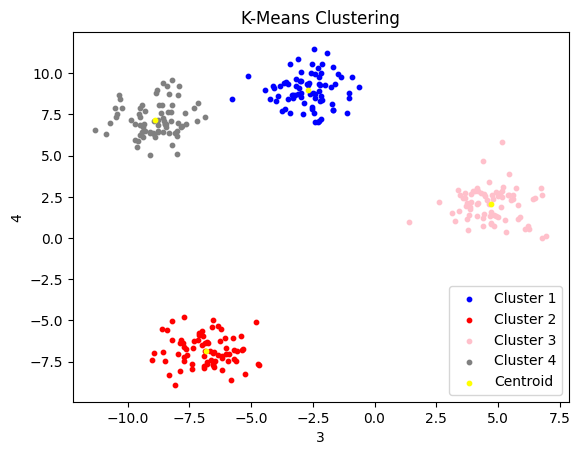

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

data = pd.read_csv('/content/sample_data/Customers.csv')
data.head()

x, _ = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_pred = kmeans.fit_predict(x)

plt.scatter(x[y_pred == 0, 0],x[y_pred == 0, 1], s=10, c="blue", label="Cluster 1")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1], s=10, c="red", label="Cluster 2")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1], s=10, c="pink", label="Cluster 3")
plt.scatter(x[y_pred==3,0],x[y_pred==3,1], s=10, c="grey", label="Cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=10, c="yellow", label="Centroid") #cluster
plt.title("K-Means Clustering")
plt.xlabel("3")
plt.ylabel("4")
plt.legend()
plt.show()

# **Clustering Hierarchy**#

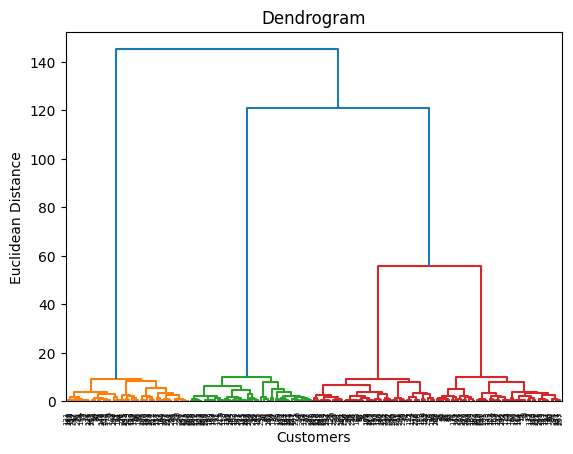

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Load data
X, _ = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)  # Using columns 3 (Annual Income) and 4 (Spending Score)

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# **DB Scan**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.9, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan,marker='o')
plt.title("DBSCAN Clustering with make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# **KNN**

Confusion Matrix:
 [[48  4]
 [ 3 25]]
Accuracy: 0.9125


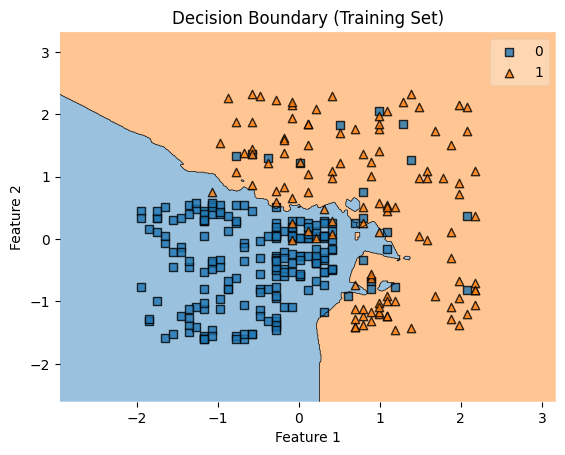

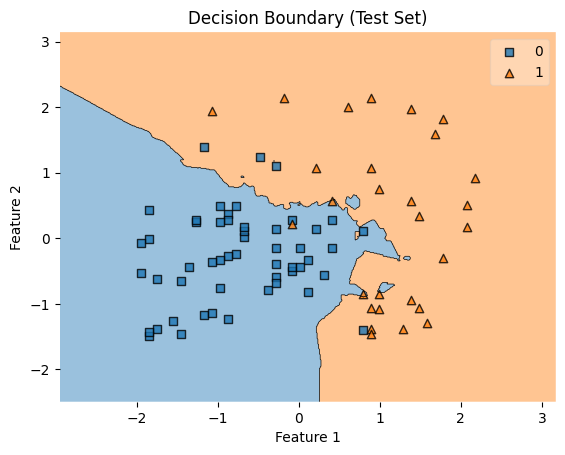

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

# Load dataset and split features/target
data = pd.read_csv('suv_data.csv')
X, y = data.iloc[:, [2, 3]].values, data.iloc[:, -1].values

# Split into training and test sets, then scale features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# Train K-NN model and make predictions
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize decision boundaries for the training set
plot_decision_regions(X_train, y_train, clf=knn)
plt.title("Decision Boundary (Training Set)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize decision boundaries for the test set
plot_decision_regions(X_test, y_test, clf=knn)
plt.title("Decision Boundary (Test Set)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# **SVM**

Confusion Matrix:
 [[50  2]
 [ 9 19]]
Accuracy: 0.8625


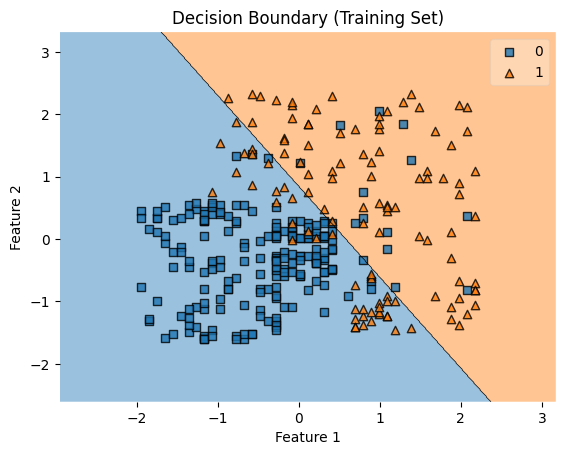

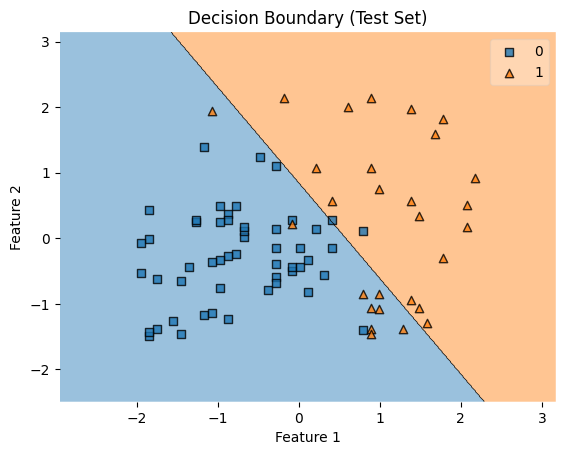

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

# Load dataset and split features/target
data = pd.read_csv('suv_data.csv')
X, y = data.iloc[:, [2, 3]].values, data.iloc[:, -1].values

# Split into training and test sets, then scale features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# Train SVM model and make predictions
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize decision boundaries for the training set
plot_decision_regions(X_train, y_train, clf=svm)
plt.title("Decision Boundary (Training Set)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize decision boundaries for the test set
plot_decision_regions(X_test, y_test, clf=svm)
plt.title("Decision Boundary (Test Set)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Naive **Bayes**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = ["I love programming", "Python is great", "I hate bugs", "Debugging is fun","Programming is also bad"]
labels = ["positive", "positive", "negative", "positive", "negative"]

# Using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

custom_text = ["ok","hate","good"]
custom_text = vectorizer.transform(custom_text)
prediction = model.predict(custom_text)
print("Prediction for custom text:", prediction)

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Prediction for custom text: ['positive' 'positive' 'positive']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **HMM**

In [ ]:
from hmmlearn import hmm
import numpy as np

# Define the model parameters
states = ["Rainy", "Sunny"]
observations = ["Walk", "Shop", "Clean"]
n_states = len(states)
n_observations = len(observations)

# Transition probabilities
start_probability = np.array([0.6, 0.4])  # Initial state probabilities
transition_probability = np.array([
    [0.7, 0.3],  # Rainy -> (Rainy, Sunny)
    [0.4, 0.6],  # Sunny -> (Rainy, Sunny)
])

# Emission probabilities
emission_probability = np.array([
    [0.1, 0.4, 0.5],  # Rainy -> (Walk, Shop, Clean)
    [0.6, 0.3, 0.1],  # Sunny -> (Walk, Shop, Clean)
])

# Create the MultinomialHMM
model = hmm.MultinomialHMM(n_components=n_states, random_state=42, n_trials=1)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability


observation_sequence = np.array([[1, 0, 0], [0, 0, 1], [0, 1, 0]])  # Walk -> Clean -> Shop

# Decode the sequence using the Viterbi algorithm
logprob, state_sequence = model.decode(observation_sequence, algorithm="viterbi")
print("Most likely states:", [states[state] for state in state_sequence])

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Most likely states: ['Sunny', 'Rainy', 'Rainy']


# **Find S**

In [ ]:
def find_s_algorithm(data):
    """
    Implement the Find-S algorithm to find the most specific hypothesis.
    """
    num_attributes = len(data[0]) - 1  # Last column is the label
    hypothesis = ['Ø'] * num_attributes  # Initialize hypothesis to the most specific

    # Iterate through each instance in the data
    for instance in data:
        if instance[-1].lower() == 'yes':  # Check for positive instance
            print(f"Instance {instance} is a Positive Instance")
            for j in range(num_attributes):
                if hypothesis[j] == 'Ø':  # If hypothesis is still 'Ø'
                    hypothesis[j] = instance[j]  # Set to the attribute value
                elif hypothesis[j] != instance[j]:  # If it doesn't match
                    hypothesis[j] = '?'  # Generalize

            print(f"The hypothesis for the training instance is: {hypothesis} \n")

    return hypothesis


# Define the training data
training_data = [
    ["Sunny", "Hot", "High", False, "No"],
    ["Sunny", "Hot", "High", True, "No"],
    ["Overcast", "Hot", "High", False, "Yes"],
    ["Rain", "Mild", "High", False, "Yes"],
    ["Rain", "Cool", "Normal", False, "No"],
    ["Rain", "Cool", "Normal", True, "Yes"],
    ["Overcast", "Cool", "Normal", True, "Yes"],
    ["Sunny", "Mild", "High", False, "No"],
    ["Sunny", "Mild", "Normal", True, "Yes"],
    ["Overcast", "Mild", "High", True, "Yes"],
]

# Run the FIND-S algorithm
final_hypothesis = find_s_algorithm(training_data)
print(f"The Maximally Specific Hypothesis is: {final_hypothesis}")


Instance ['Overcast', 'Hot', 'High', False, 'Yes'] is a Positive Instance
The hypothesis for the training instance is: ['Overcast', 'Hot', 'High', False] 

Instance ['Rain', 'Mild', 'High', False, 'Yes'] is a Positive Instance
The hypothesis for the training instance is: ['?', '?', 'High', False] 

Instance ['Rain', 'Cool', 'Normal', True, 'Yes'] is a Positive Instance
The hypothesis for the training instance is: ['?', '?', '?', '?'] 

Instance ['Overcast', 'Cool', 'Normal', True, 'Yes'] is a Positive Instance
The hypothesis for the training instance is: ['?', '?', '?', '?'] 

Instance ['Sunny', 'Mild', 'Normal', True, 'Yes'] is a Positive Instance
The hypothesis for the training instance is: ['?', '?', '?', '?'] 

Instance ['Overcast', 'Mild', 'High', True, 'Yes'] is a Positive Instance
The hypothesis for the training instance is: ['?', '?', '?', '?'] 

The Maximally Specific Hypothesis is: ['?', '?', '?', '?']


# *Candidate elimi*

In [ ]:
import numpy as np
import pandas as pd

# Function to learn from the DataFrame
def learn(concepts,target):
    # Extracting concepts (features) and target (labels) from the DataFrame


    # Initialization
    specific_h = concepts[0].copy()
    print("Initialization of specific_h:\n", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("Initialization of general_h:\n", general_h)

    # Iterate over each example in the dataset
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            print("If instance is Positive:")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = "?"
        elif target[i] == "no":
            print("If instance is Negative:")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = "?"

        # Print intermediate results
        print(f"Step {i+1}:")
        print("Specific_h:", specific_h)
        print("General_h:", general_h)
        print("\n")

    # Remove redundant general hypotheses
    general_h = [h for h in general_h if h != ["?" for _ in range(len(specific_h))]]

    return specific_h, general_h


# Example usage with a DataFrame
# Create a sample DataFrame
data=np.array([['sunny','warm','normal','strong','warm ','same'],
               ['sunny','warm','high','strong','warm ','same'],
['rainy','cold','normal','strong','warm ','change'],
['sunny','warm','high','strong','cool','change']])
target=["yes","yes","no","yes"]

# Run the learning function
s_final, g_final = learn(data,target)

# Print final hypotheses
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")


Initialization of specific_h:
 ['sunny' 'warm' 'normal' 'strong' 'warm ' 'same']
Initialization of general_h:
 [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
If instance is Positive:
Step 1:
Specific_h: ['sunny' 'warm' 'normal' 'strong' 'warm ' 'same']
General_h: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]


If instance is Positive:
Step 2:
Specific_h: ['sunny' 'warm' '?' 'strong' 'warm ' 'same']
General_h: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]


If instance is Negative:
Step 3:
Specific_h: ['sunny' 'warm' '?' 'strong' 'warm ' 'same']
General_h

# **ID3**

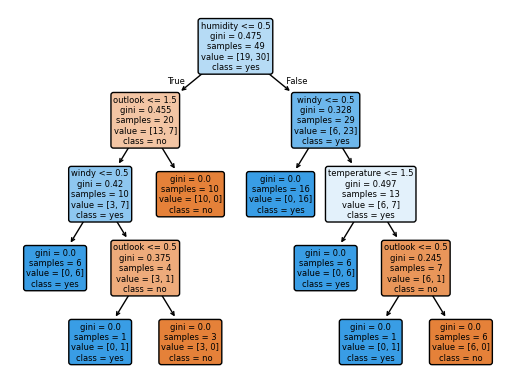

|--- humidity <= 0.50
|   |--- outlook <= 1.50
|   |   |--- windy <= 0.50
|   |   |   |--- class: yes
|   |   |--- windy >  0.50
|   |   |   |--- outlook <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- outlook >  0.50
|   |   |   |   |--- class: no
|   |--- outlook >  1.50
|   |   |--- class: no
|--- humidity >  0.50
|   |--- windy <= 0.50
|   |   |--- class: yes
|   |--- windy >  0.50
|   |   |--- temperature <= 1.50
|   |   |   |--- class: yes
|   |   |--- temperature >  1.50
|   |   |   |--- outlook <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- outlook >  0.50
|   |   |   |   |--- class: no



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
import matplotlib.pyplot as plt

d=pd.read_csv("weather.csv")

outlook_map = {"overcast": 0, "rainy": 1, "sunny": 2}
temperature_map = {"hot": 0, "mild": 1, "cool": 2}
humidity_map = {"high": 0, "normal": 1}
windy_map = {False: 0, True: 1}
play_map = {"no": 0, "yes": 1}

d["outlook"] = d["outlook"].map(outlook_map)
d["temperature"] = d["temperature"].map(temperature_map)
d["humidity"] = d["humidity"].map(humidity_map)
d["windy"] = d["windy"].map(windy_map)
d["play"] = d["play"].map(play_map)

X=d.drop('play',axis=1)
y=d['play']

model=DecisionTreeClassifier()
model.fit(X,y)


plot_tree(model, feature_names=['outlook','temperature','humidity','windy'], class_names=["no", "yes"], filled=True, rounded=True)
plt.show()
print(export_text(model,feature_names=['outlook','temperature','humidity','windy'], class_names=["no", "yes"]))

# **FACE**

In [ ]:
FAce

import cv2
import matplotlib.pyplot as plt
x=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
image=cv2.imread("soft copy.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = x.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
if len(faces) > 0:
        print(f"Faces detected: {len(faces)}")
else:
        print("No face detected.")
plt.imshow(image)